<a href="https://colab.research.google.com/github/bhgtankita/DL_Colab/blob/master/Garbage_segregator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --header="Host: doc-04-54-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/0B3P9oO5A3RvSUW9qTG11Ul83TEE" --header="Cookie: AUTH_8i4qcj29pfugg26jaivfj1dsu40avhjo_nonce=ifndnn6r3amca" --header="Connection: keep-alive" "https://doc-04-54-docs.googleusercontent.com/docs/securesc/ohtcfprsa3vqsg41cl0o62sdpk302ip0/j0qg1kknqn8s4kjl60j0dmqjve9p0t1j/1563588000000/02936877558474928743/01013830422934825035/0B3P9oO5A3RvSNWw5X0c5R1hJRnc?e=download&nonce=ifndnn6r3amca&user=01013830422934825035&hash=aeqkt453qn7ffls7phn1nf3dumqhgdur" -O "dataset-resized.zip" -c

--2019-07-20 04:06:12--  https://doc-04-54-docs.googleusercontent.com/docs/securesc/ohtcfprsa3vqsg41cl0o62sdpk302ip0/j0qg1kknqn8s4kjl60j0dmqjve9p0t1j/1563588000000/02936877558474928743/01013830422934825035/0B3P9oO5A3RvSNWw5X0c5R1hJRnc?e=download&nonce=ifndnn6r3amca&user=01013830422934825035&hash=aeqkt453qn7ffls7phn1nf3dumqhgdur
Resolving doc-04-54-docs.googleusercontent.com (doc-04-54-docs.googleusercontent.com)... 216.58.197.161, 2404:6800:4004:801::2001
Connecting to doc-04-54-docs.googleusercontent.com (doc-04-54-docs.googleusercontent.com)|216.58.197.161|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
!ls dataset-resized

cardboard  glass  metal  paper	plastic  trash


In [0]:
!unzip -q dataset-resized.zip

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
# from keras.utils import to_categorical
from keras.utils import np_utils

In [43]:
os.listdir('dataset-resized')

['cardboard', 'glass', 'paper', 'plastic', 'metal', 'trash']

In [0]:
!rm -rf dataset-resized/.DS_Store

In [0]:
dirpath = "dataset-resized/"
dirs = os.listdir(dirpath)

dataset-resized/cardboard


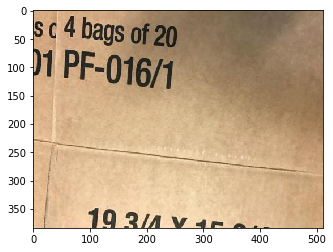

In [45]:
for file in dirs:
  path = os.path.join(dirpath, file)
  print(path)
  if path != "dataset-resized/.DS_Store":
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
      plt.imshow(img_array)
      plt.show()
      break
    break

In [46]:
print(img_array)

[[[209 167 125]
  [211 169 127]
  [215 173 131]
  ...
  [159 133 108]
  [159 133 108]
  [158 132 107]]

 [[212 170 128]
  [214 172 130]
  [217 175 133]
  ...
  [159 133 108]
  [158 132 107]
  [157 131 106]]

 [[216 174 132]
  [218 176 134]
  [220 178 136]
  ...
  [159 133 108]
  [158 132 107]
  [156 130 105]]

 ...

 [[241 199 157]
  [241 199 157]
  [241 199 157]
  ...
  [209 167 125]
  [206 164 122]
  [204 162 120]]

 [[242 200 158]
  [244 202 160]
  [245 203 161]
  ...
  [208 166 124]
  [205 163 121]
  [203 161 119]]

 [[244 202 160]
  [246 204 162]
  [248 206 164]
  ...
  [207 165 123]
  [204 162 120]
  [201 159 117]]]


In [47]:
img_array.shape

(384, 512, 3)

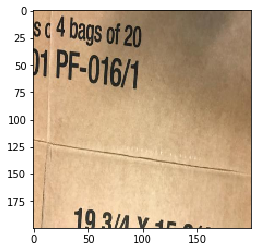

In [48]:
img_size = 200

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
  for file in dirs:
    path = os.path.join(dirpath, file)
    if path != "dataset-resized/.DS_Store":
      class_num = dirs.index(file)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array, (img_size, img_size))
          new_array = cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB)
          training_data.append([new_array, class_num])
        except Exception as p:
          pass
      
create_training_data()      

In [50]:
print(len(training_data))

2527


In [51]:
training_data[0][0]

array([[[212, 170, 128],
        [216, 174, 132],
        [215, 173, 131],
        ...,
        [159, 133, 108],
        [160, 134, 109],
        [158, 132, 107]],

       [[218, 176, 134],
        [218, 176, 134],
        [215, 173, 131],
        ...,
        [160, 134, 109],
        [161, 135, 110],
        [157, 131, 106]],

       [[219, 177, 135],
        [215, 173, 131],
        [211, 169, 127],
        ...,
        [160, 134, 109],
        [163, 137, 112],
        [158, 132, 107]],

       ...,

       [[241, 199, 157],
        [239, 197, 155],
        [232, 190, 148],
        ...,
        [214, 172, 130],
        [212, 171, 128],
        [210, 168, 126]],

       [[241, 199, 157],
        [239, 197, 155],
        [233, 191, 149],
        ...,
        [214, 172, 130],
        [212, 170, 128],
        [206, 164, 122]],

       [[245, 202, 160],
        [247, 205, 163],
        [238, 196, 154],
        ...,
        [214, 172, 130],
        [212, 170, 128],
        [204, 162, 120]]

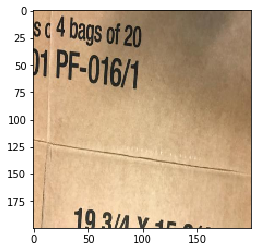

In [52]:
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [0]:
import random

random.shuffle(training_data)

In [54]:
for sample in training_data[:10]:
  print(sample[1])

4
3
3
4
1
5
4
2
2
2


In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
  X.append(features)
  y.append(label)
  
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [0]:
# import pickle

# pickle_out = open("X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [0]:
# pickle_in = open("X.pickle", "rb")
# X = pickle_load(pickle_in)

# pickle_in = open("y.pickle", "rb")
# y = pickle_load(pickle_in)

In [58]:
X = X/255.0
y = np.array(y)
y_cat = np_utils.to_categorical(y, 6)

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(6))
model.add(Activation('sigmoid'))
opt = SGD(lr=0.1, decay=1e-2, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X, y_cat, batch_size=32, epochs=50, validation_split=0.3)

Train on 1768 samples, validate on 759 samples
Epoch 1/50
1768/1768 [==============================] - 18s 10ms/step - loss: 4.8039 - acc: 0.1606 - val_loss: 4.8400 - val_acc: 0.1568
Epoch 2/50
1768/1768 [==============================] - 17s 10ms/step - loss: 5.0971 - acc: 0.1606 - val_loss: 4.8400 - val_acc: 0.1568
Epoch 3/50
1768/1768 [==============================] - 17s 9ms/step - loss: 5.0971 - acc: 0.1606 - val_loss: 4.8400 - val_acc: 0.1568
Epoch 4/50
1768/1768 [==============================] - 17s 9ms/step - loss: 5.0971 - acc: 0.1606 - val_loss: 4.8400 - val_acc: 0.1568
Epoch 5/50
1768/1768 [==============================] - 17s 9ms/step - loss: 5.0971 - acc: 0.1606 - val_loss: 4.8400 - val_acc: 0.1568
Epoch 6/50
1768/1768 [==============================] - 17s 10ms/step - loss: 5.0971 - acc: 0.1606 - val_loss: 4.8400 - val_acc: 0.1568
Epoch 7/50
1768/1768 [==============================] - 17s 10ms/step - loss: 5.0971 - acc: 0.1606 - val_loss: 4.8400 - val_acc: 0.1568
Epoc